In [42]:
import matplotlib.pyplot as plt
import numpy as np
import discopy.util as util
import discopy.plot as plot
import discopy.geom as geom
from pathlib import Path
plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-pastel')
import pandas as pd
import h5py
from scipy.fft import fft, ifft
from scipy import signal
from scipy.stats import chi2

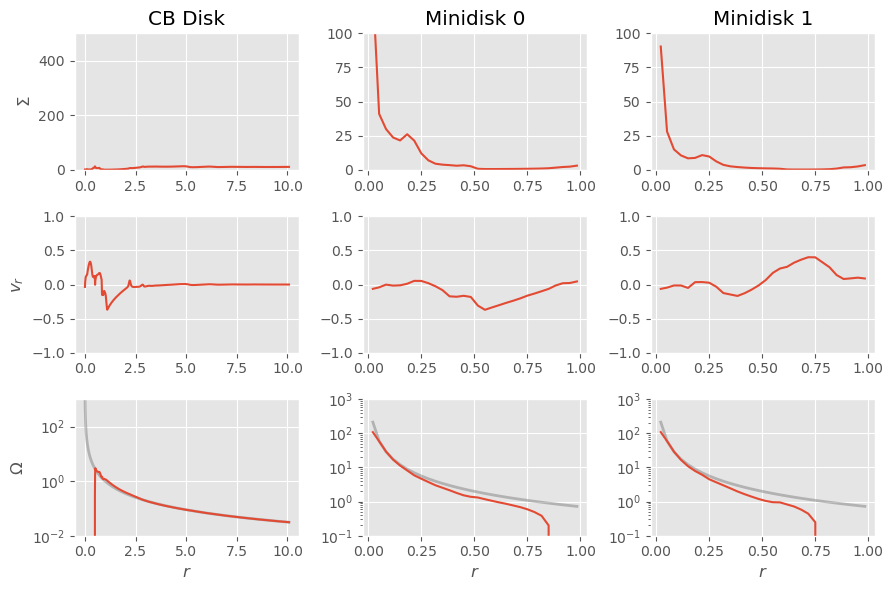

In [23]:
# def R_centroid(rm, rp):

#     rc = 2*(rm*rm + rm*rp + rp*rp) / (3*(rm + rp))

#     return rc

# # Get just the filename
# # name = snap_path.stem
# Rmd_max=1.0
# Nr_md=30

# # Load the snapshot data ("_" data are redundant, already returned by Qrz)
# t, r, z, Qrz, rf, zf, planetDat = util.loadSnapshotRZ(snap_path)
# t, Qarr, _, _, _ = util.loadSnapshotArr(snap_path)

# # Reshape the raw Qarr into a more usable shape
# # [Num_planets, Num_R_minidisk, Num_quantities+1]
# Qmd = Qarr.reshape(2, Nr_md, 20)

# # Grab the planet Masses
# M0 = planetDat[0, 0]
# M1 = planetDat[1, 0]

# # These are the cell "centers" (really, centroid) in radius.
# R = R_centroid(rf[:-1], rf[1:])

# # These are the bin edges for the radial bins for the minidisks
# Rf_md = np.linspace(0.0, Rmd_max, Nr_md+1)

# # And the minidisk radial centroids
# R_md = R_centroid(Rf_md[:-1], Rf_md[1:])

# # Circumbinary density, radial velocity, angular velocity
# sig_cb = Qrz[0, :, 0]
# vr_cb = Qrz[0, :, 1] / Qrz[0, :, 0]
# om_cb = Qrz[0, :, 2] / (R**2 * Qrz[0, :, 0])

# # Minidisk density, velocities for BH 0
# sig_0 = Qmd[0, :, 1] / Qmd[0, :, 0]
# vr_0 = Qmd[0, :, 2] / Qmd[0, :, 1]
# om_0 = Qmd[0, :, 3] / (R_md**2 * Qmd[0, :, 1])
# Mdot_0 = Qmd[0, :, 1]

# # Minidisk density, velocities for BH 1
# sig_1 = Qmd[1, :, 1] / Qmd[1, :, 0]
# vr_1 = Qmd[1, :, 2] / Qmd[1, :, 1]
# om_1 = Qmd[1, :, 3] / (R_md**2 * Qmd[1, :, 1])
# Mdot_0 = Qmd[1, :, 1]

# M = M0 + M1
# Om_kep_cb = np.sqrt(M / R**3)
# Om_kep_md0 = np.sqrt(M0 / R_md**3)
# Om_kep_md1 = np.sqrt(M1 / R_md**3)

# # Make a plot
# fig, ax = plt.subplots(3, 3, figsize=(9, 6))

# # Plot the densities
# ax[0, 0].plot(R, sig_cb)
# ax[0, 1].plot(R_md, sig_0)
# ax[0, 2].plot(R_md, sig_1)

# # Plot the radial velocities densities
# ax[1, 0].plot(R, vr_cb)
# ax[1, 1].plot(R_md, vr_0)
# ax[1, 2].plot(R_md, vr_1)

# # Plot the keplerian angular velocities
# ax[2, 0].plot(R, Om_kep_cb, alpha=0.5, lw=2, color='grey')
# ax[2, 1].plot(R_md, Om_kep_md0, alpha=0.5, lw=2, color='grey')
# ax[2, 2].plot(R_md, Om_kep_md1, alpha=0.5, lw=2, color='grey')

# # Plot the actual angular velocities
# ax[2, 0].plot(R, om_cb)
# ax[2, 1].plot(R_md, om_0)
# ax[2, 2].plot(R_md, om_1)

# # Column titles!
# ax[0, 0].set_title("CB Disk")
# ax[0, 1].set_title("Minidisk 0")
# ax[0, 2].set_title("Minidisk 1")

# # Make densty plots nice 
# ax[0, 0].set(ylabel=r'$\Sigma$', ylim=(0, 500))
# ax[0, 1].set(ylim=(0, 100))
# ax[0, 2].set(ylim=(0, 100))

# # Make radial velocity plots nice 
# ax[1, 0].set(ylabel=r'$v_r$', ylim=(-1, 1))
# ax[1, 1].set(ylim=(-1, 1))
# ax[1, 2].set(ylim=(-1, 1))

# # Make angular velocity plots nice 
# ax[2, 0].set(ylabel=r'$\Omega$', xlabel=r'$r$',
#                 ylim=(0.01, 1000), yscale='log')
# ax[2, 1].set(xlabel=r'$r$',
#                 ylim=(0.1, 1000), yscale='log')
# ax[2, 2].set(xlabel=r'$r$',
#                 ylim=(0.1, 1000), yscale='log')

# # Make sure everything fits nicely
# fig.tight_layout()

# # # Save and close!
# # figname = name + ".png"
# # print("Saving", figname)
# # fig.savefig(figname)
# # plt.close(fig)

In [24]:
# R_new = R_md[7:15]
# Om_kep_md0_new = Om_kep_md0[7:15]
# Om_kep_md1_new = Om_kep_md1[7:15]
# om_0_new = om_0[7:15]
# om_1_new = om_1[7:15]
# # R_mask = (R_new < 0.5)
# max_om0 = np.max(Om_kep_md0_new - om_0_new)
# max_om1 = np.max(Om_kep_md1_new - om_1_new)

In [25]:
# R_cut = R_new[(Om_kep_md0_new - om_0_new) == max_om0]
# percent_max_diff_0 = max_om0 / Om_kep_md0_new[R_new == R_cut]

In [29]:
# # Using Mdot to determine minidisk radius
# Mdot_0 = vr_0 * (-2 * np.pi) * R_md * sig_0
# Mdot_1 = vr_1 * (-2 * np.pi) * R_md * sig_1

# dMdot_0 = Mdot_0[1:] - Mdot_0[:-1]
# dMdot_1 = Mdot_1[1:] - Mdot_1[:-1]
# R_cut_0 = R_md[1:][dMdot_0 > 0]
# R_cut_1 = R_md[1:][dMdot_1 > 0]
# R_cut_0 = R_cut_0[R_cut_0 > 0.5][0]
# R_cut_1 = R_cut_1[R_cut_1 > 0.5][0]
# R_cut_0, R_cut_1

IndexError: index 0 is out of bounds for axis 0 with size 0

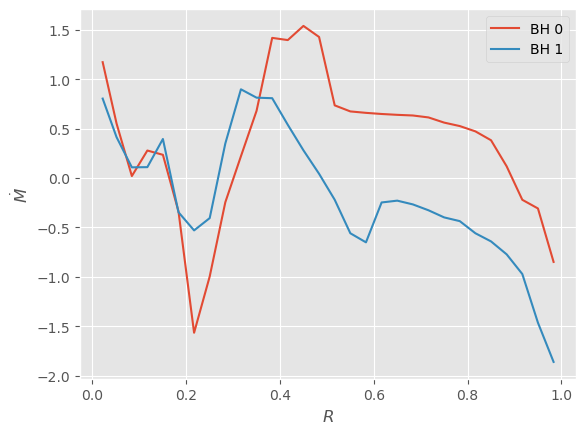

In [30]:
# fig, ax = plt.subplots(1, 1)
# ax.plot(R_md, Mdot_0, label = 'BH 0')
# ax.plot(R_md, Mdot_1, label = 'BH 1')
# ax.set_xlabel(r'$R$')
# ax.set_ylabel(r'$\dot{M}$')
# plt.legend()
# plt.show()

Start here for funning saving data

In [5]:
def R_centroid(rm, rp):
    rc = 2*(rm*rm + rm*rp + rp*rp) / (3*(rm + rp))
    return rc

def get_value_snapshots(snap_path):
    Rmd_max=1.0
    Nr_md=30

    # Load the snapshot data ("_" data are redundant, already returned by Qrz)
    t, r, z, Qrz, rf, zf, planetDat = util.loadSnapshotRZ(snap_path)
    t, Qarr, _, _, _ = util.loadSnapshotArr(snap_path)

    # Reshape the raw Qarr into a more usable shape
    # [Num_planets, Num_R_minidisk, Num_quantities+1]
    Qmd = Qarr.reshape(2, Nr_md, 20)

    # Grab the planet Masses
    M0 = planetDat[0, 0]
    M1 = planetDat[1, 0]

    # These are the cell "centers" (really, centroid) in radius.
    R = R_centroid(rf[:-1], rf[1:])

    # These are the bin edges for the radial bins for the minidisks
    Rf_md = np.linspace(0.0, Rmd_max, Nr_md+1)

    # And the minidisk radial centroids
    R_md = R_centroid(Rf_md[:-1], Rf_md[1:])

    # Circumbinary density, radial velocity, angular velocity
    sig_cb = Qrz[0, :, 0]
    vr_cb = Qrz[0, :, 1] / Qrz[0, :, 0]
    om_cb = Qrz[0, :, 2] / (R**2 * Qrz[0, :, 0])

    # Minidisk density, velocities for BH 0
    sig_0 = Qmd[0, :, 1] / Qmd[0, :, 0]
    vr_0 = Qmd[0, :, 2] / Qmd[0, :, 1]
    om_0 = Qmd[0, :, 3] / (R_md**2 * Qmd[0, :, 1])
    Mdot_0 = Qmd[0, :, 2] * 2 * np.pi * R_md / Qmd[0, :, 0]

    # Minidisk density, velocities for BH 1
    sig_1 = Qmd[1, :, 1] / Qmd[1, :, 0]
    vr_1 = Qmd[1, :, 2] / Qmd[1, :, 1]
    om_1 = Qmd[1, :, 3] / (R_md**2 * Qmd[1, :, 1])
    Mdot_1 = Qmd[1, :, 2] * 2 * np.pi * R_md / Qmd[1, :, 0]

    M = M0 + M1
    Om_kep_cb = np.sqrt(M / R**3)
    Om_kep_md0 = np.sqrt(M0 / R_md**3)
    Om_kep_md1 = np.sqrt(M1 / R_md**3)


    return t, Mdot_0, Mdot_1, vr_0, vr_1, om_0, om_1, sig_0, sig_1

In [62]:
def R_centroid(rm, rp):
    rc = 2*(rm*rm + rm*rp + rp*rp) / (3*(rm + rp))
    return rc
snap_path_R_md = '/gpfs/hsu/BH_disco_runs/0721cb_circular_1000_orbits/snapshot_000000.h5'
Rmd_max=1.0
Nr_md=30

# Load the snapshot data ("_" data are redundant, already returned by Qrz)
t, r, z, Qrz, rf, zf, planetDat = util.loadSnapshotRZ(snap_path_R_md)
t, Qarr, _, _, _ = util.loadSnapshotArr(snap_path_R_md)

# Reshape the raw Qarr into a more usable shape
# [Num_planets, Num_R_minidisk, Num_quantities+1]
Qmd = Qarr.reshape(2, Nr_md, 20)

# Grab the planet Masses
M0 = planetDat[0, 0]
M1 = planetDat[1, 0]

# These are the cell "centers" (really, centroid) in radius.
R = R_centroid(rf[:-1], rf[1:])

# These are the bin edges for the radial bins for the minidisks
Rf_md = np.linspace(0.0, Rmd_max, Nr_md+1)

# And the minidisk radial centroids
R_md = R_centroid(Rf_md[:-1], Rf_md[1:])


dir_path = '/gpfs/hsu/BH_disco_runs/0721cb_circular_1000_orbits/'
n_start = 5000
n_end = 10000
nt = n_end - n_start
t = np.empty(nt)
Mdot_0 = np.empty((nt, len(R_md)))
Mdot_1 = np.empty((nt, len(R_md)))
vr_0 = np.empty((nt, len(R_md)))
vr_1 = np.empty((nt, len(R_md)))
om_0 = np.empty((nt, len(R_md)))
om_1 = np.empty((nt, len(R_md)))
sig_0 = np.empty((nt, len(R_md)))
sig_1 = np.empty((nt, len(R_md)))
Mtot_0 = np.empty((nt, len(R_md)))
Mtot_1 = np.empty((nt, len(R_md)))

for i in range(nt):
    label = '{0:06d}'.format(i + n_start)
    snap_name = dir_path + '/snapshot_' + label + '.h5'
    t[i], Mdot_0[i,:], Mdot_1[i,:], vr_0[i,:], vr_1[i,:], om_0[i,:], om_1[i,:], sig_0[i,:], sig_1[i,:]= get_value_snapshots(snap_name)

In [63]:
dr = Rf_md[1:] - Rf_md[:-1]

Mdot_0_mean = np.mean(Mdot_0, axis=0)
Mdot_1_mean = np.mean(Mdot_1, axis=0)
vr_0_mean = np.mean(vr_0, axis=0)
vr_1_mean = np.mean(vr_1, axis=0)
om_0_mean = np.mean(om_0, axis=0)
om_1_mean = np.mean(om_1, axis=0)
sig_0_mean = np.mean(sig_0, axis=0)
sig_1_mean = np.mean(sig_1, axis=0)

# r_ind_0 = sig_0.argmin(axis=1)
# r_ind_1 = sig_1.argmin(axis=1)

# # Total mass

# Mtot_0 = np.empty(nt)
# Mtot_1 = np.empty(nt)
# for i in range(nt):
#     Mtot_0[i] = 2*np.pi * np.sum((sig_0[i] * R_md * dr)[:r_ind_0[i]])
#     Mtot_1[i] = 2*np.pi * np.sum((sig_1[i] * R_md * dr)[:r_ind_1[i]])

r_ind_0 = sig_0_mean.argmin()
r_ind_1 = sig_1_mean.argmin()
Mtot_0 = np.empty(nt)
Mtot_1 = np.empty(nt)
for i in range(nt):
    Mtot_0[i] = 2*np.pi * np.sum((sig_0[i] * R_md * dr)[:r_ind_0])
    Mtot_1[i] = 2*np.pi * np.sum((sig_1[i] * R_md * dr)[:r_ind_1])

In [64]:
t_step_1 = 10
t_step_2 = 100
t_step_3 = 1000

Mtot_0_df = pd.DataFrame({'Mtot_0': Mtot_0})
Mtot_1_df = pd.DataFrame({'Mtot_1': Mtot_1})

Mtot_0_avg_1 = Mtot_0_df['Mtot_0'].rolling(t_step_1).mean()
Mtot_1_avg_1 = Mtot_1_df['Mtot_1'].rolling(t_step_1).mean()
Mtot_0_avg_2 = Mtot_0_df['Mtot_0'].rolling(t_step_2).mean()
Mtot_1_avg_2 = Mtot_1_df['Mtot_1'].rolling(t_step_2).mean()
Mtot_0_avg_3 = Mtot_0_df['Mtot_0'].rolling(t_step_3).mean()
Mtot_1_avg_3 = Mtot_1_df['Mtot_1'].rolling(t_step_3).mean()

In [65]:
dt = t[1]-t[0]
data = Mtot_0
freqs_0, psd_0 = signal.welch(data, (2 * np.pi) /dt, window='hamming',nperseg=len(data)/2, nfft=10*(len(data)*2 + 1), return_onesided=True, scaling='spectrum', detrend='linear')
data = Mtot_1
freqs_1, psd_1 = signal.welch(data, (2 * np.pi) /dt, window='hamming',nperseg=len(data)/2, nfft=10*(len(data)*2 + 1), return_onesided=True, scaling='spectrum', detrend='linear')

In [66]:
path_out = '/gpfs/hsu/Black_Hole_Accretion_Project_PI/Python_scripts/periodicity_mtot_minidisk.h5py'
with h5py.File(path_out, 'a') as f:
    # f.create_dataset('e7_BH0_Mtot_1_orbavg', data=Mtot_0_avg_1)
    # f.create_dataset('e7_BH1_Mtot_1_orbavg', data=Mtot_1_avg_1)
    # f.create_dataset('e7_BH0_Mtot_10_orbavg', data=Mtot_0_avg_2)
    # f.create_dataset('e7_BH1_Mtot_10_orbavg', data=Mtot_1_avg_2)
    # f.create_dataset('e7_BH0_Mtot_freqs', data=freqs_0)
    # f.create_dataset('e7_BH1_Mtot_freqs', data=freqs_1)
    f.create_dataset('e0_BH0_Mtot_psd', data=psd_0)
    f.create_dataset('e0_BH1_Mtot_psd', data=psd_1)

In [67]:
path_out = '/gpfs/hsu/Black_Hole_Accretion_Project_PI/Python_scripts/periodicity_mtot_minidisk.h5py'
with h5py.File(path_out, 'r') as f:
    print(f.keys())

<KeysViewHDF5 ['e0_BH0_Mtot_10_orbavg', 'e0_BH0_Mtot_1_orbavg', 'e0_BH0_Mtot_freqs', 'e0_BH0_Mtot_psd', 'e0_BH1_Mtot_10_orbavg', 'e0_BH1_Mtot_1_orbavg', 'e0_BH1_Mtot_freqs', 'e0_BH1_Mtot_psd', 'e1_BH0_Mtot_10_orbavg', 'e1_BH0_Mtot_1_orbavg', 'e1_BH0_Mtot_freqs', 'e1_BH0_Mtot_psd', 'e1_BH1_Mtot_10_orbavg', 'e1_BH1_Mtot_1_orbavg', 'e1_BH1_Mtot_freqs', 'e1_BH1_Mtot_psd', 'e2_BH0_Mtot_10_orbavg', 'e2_BH0_Mtot_1_orbavg', 'e2_BH0_Mtot_freqs', 'e2_BH0_Mtot_psd', 'e2_BH1_Mtot_10_orbavg', 'e2_BH1_Mtot_1_orbavg', 'e2_BH1_Mtot_freqs', 'e2_BH1_Mtot_psd', 'e3_BH0_Mtot_10_orbavg', 'e3_BH0_Mtot_1_orbavg', 'e3_BH0_Mtot_freqs', 'e3_BH0_Mtot_psd', 'e3_BH1_Mtot_10_orbavg', 'e3_BH1_Mtot_1_orbavg', 'e3_BH1_Mtot_freqs', 'e3_BH1_Mtot_psd', 'e4_BH0_Mtot_10_orbavg', 'e4_BH0_Mtot_1_orbavg', 'e4_BH0_Mtot_freqs', 'e4_BH0_Mtot_psd', 'e4_BH1_Mtot_10_orbavg', 'e4_BH1_Mtot_1_orbavg', 'e4_BH1_Mtot_freqs', 'e4_BH1_Mtot_psd', 'e5_BH0_Mtot_10_orbavg', 'e5_BH0_Mtot_1_orbavg', 'e5_BH0_Mtot_freqs', 'e5_BH0_Mtot_psd', 'e5_BH

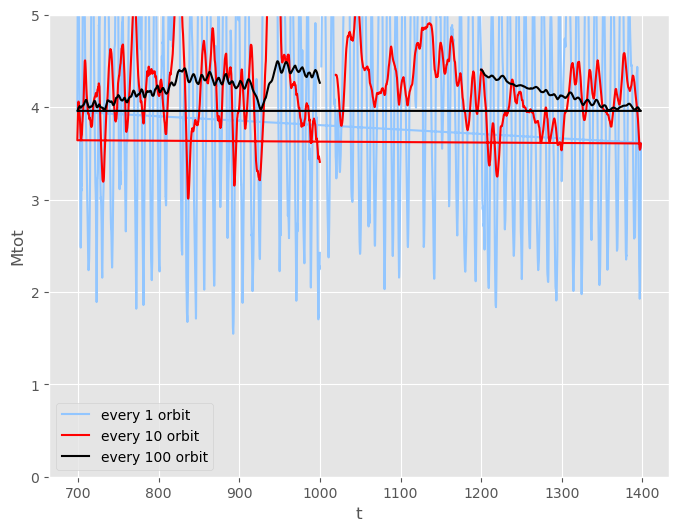

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# ax.plot(t / (2 * np.pi), Mtot_0, label='BH 1')
ax.plot(t/ (2 * np.pi), Mtot_0_avg_1, label='every 1 orbit')
ax.plot(t/ (2 * np.pi), Mtot_0_avg_2, label='every 10 orbit', color='red')
ax.plot(t/ (2 * np.pi), Mtot_0_avg_3, label='every 100 orbit', color='black')
# ax.plot(t, Mtot_1, label='BH 2')
ax.set_xlabel('t')
ax.set_ylabel('Mtot')
# ax.set_xlim(1000, 2000)
ax.set_ylim(0, 5)

plt.legend()
plt.show()

ValueError: Unable to create dataset (name already exists)

<KeysViewHDF5 ['e0', 'e0_BH0_Mtot_10_orbavg', 'e0_BH0_Mtot_1_orbavg', 'e0_BH1_Mtot_10_orbavg', 'e0_BH1_Mtot_1_orbavg', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 't', 't_orbits']>


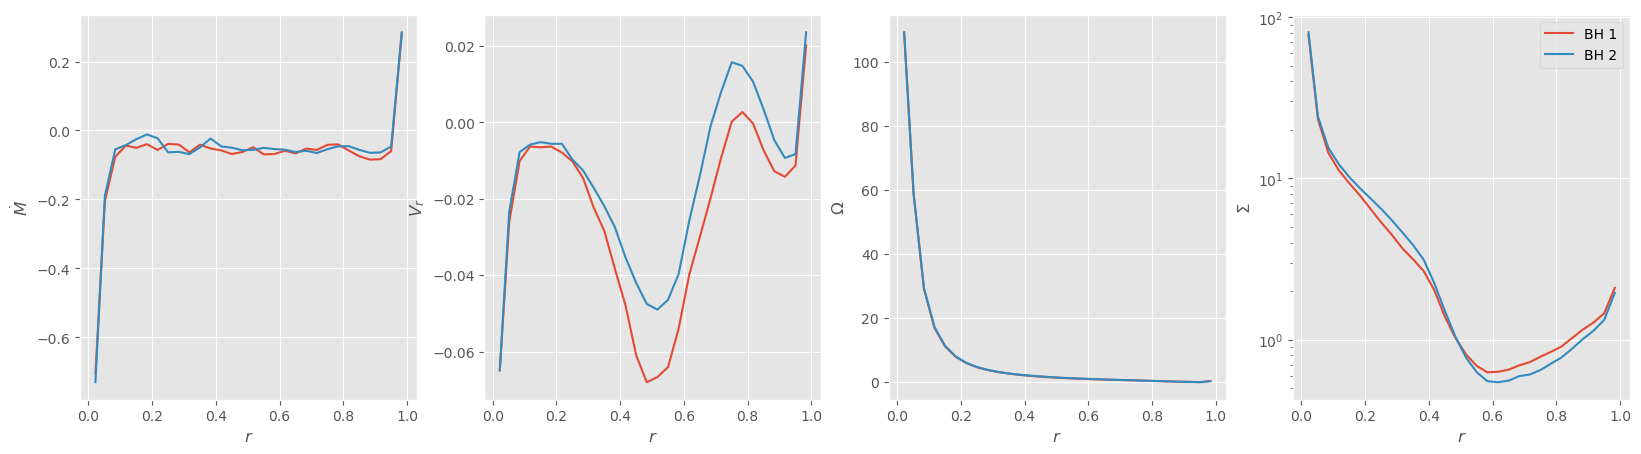

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].plot(R_md, Mdot_0_mean, label='BH 1')
ax[0].plot(R_md, Mdot_1_mean, label='BH 2')
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$\dot{M}$')

ax[1].plot(R_md, vr_0_mean, label='BH 1')
ax[1].plot(R_md, vr_1_mean, label='BH 2')
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$V_r$')

ax[2].plot(R_md, om_0_mean, label='BH 1')
ax[2].plot(R_md, om_1_mean, label='BH 2')
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$\Omega$')

ax[3].semilogy(R_md, sig_0_mean, label='BH 1')
ax[3].semilogy(R_md, sig_1_mean, label='BH 2')
ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$\Sigma$')

plt.legend()
plt.show()

In [ ]:
# from scipy import signal
# from scipy.stats import chi2
# data = Mtot_0

# colors = ["darkblue","maroon","green","peru"]
# fig1, (ax1,ax2) = plt.subplots(2,1, figsize=(8,7), sharex=True)

# ########################################################################################### spinning
# dt = 10
# im = 200
# i = 0
# for x in [[m1[im:],'$M_1$'],[m2[im:],'$M_2$'],[(m1[im:]+m2[im:]),'$M_1+M_2$'],[mdot[im:]*1000,'mdot']]:
#     data = x[0]
#     freqs, psd = signal.welch(data, 1/dt, window='hamming',nperseg=len(data)/2, nfft=10*(len(data)*2 + 1), return_onesided=True, scaling='spectrum', detrend='linear')
#     #Calculates the Confidence interval
#     P = int((len(data) - 2 )) + 1
#     #95% probability
#     probability = 0.9972
#     alfa = 1 - probability
#     v = 2 * P
#     c = chi2.ppf([1 - alfa / 2, alfa / 2], v)
#     c = v / c
#     p_lower = psd * c[0]
#     p_upper = psd * c[1]
#     ax1.plot(freqs,psd, color=colors[i], label=x[1],linestyle='-',linewidth=1.8, alpha=1)
#     ax1.fill_between(freqs, p_lower, p_upper, color=colors[i],alpha=0.2)
#     print('spinning', freqs[np.where(psd == np.amax(psd))], freqs[np.where(p_lower == np.amax(psd))])
#     i+=1

In [ ]:


data = Mtot_0[t/(2 * np.pi) > 600]
dt = t[1]-t[0]
freqs, psd = signal.welch(data, (2 * np.pi) /dt, window='hamming',nperseg=len(data)/2, nfft=10*(len(data)*2 + 1), return_onesided=True, scaling='spectrum', detrend='linear')

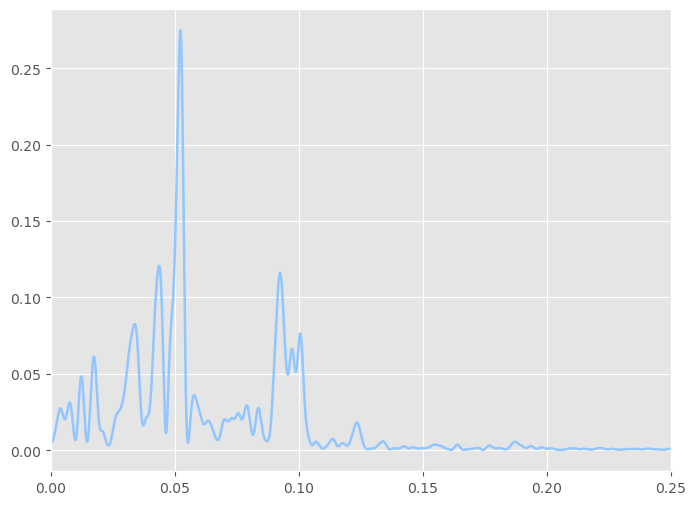

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(freqs,psd,linestyle='-',linewidth=1.8, alpha=1)
ax.set_xlim(0, 0.25)
plt.savefig('/gpfs/hsu/Black_Hole_Accretion_Project_PI/Python_plots/Mtot_minidisk/ec0p2.png',dpi=300)
# ax.fill_between(freqs, p_lower, p_upper, color=colors[i],alpha=0.2)